# Analyzing Titanic Survival Rates

#### Hiva Abolhadizadeh

In this project, the Titanic dataset, containing detailed information about the passengers aboard the RMS Titanic, is analyzed. The Titanic tragically sank during its maiden voyage in April 1912. This dataset is widely recognized for its application in data analysis and machine learning due to the richness of its features and historical importance.

The primary objective of this analysis is to explore the factors that influenced passenger survival rates. Patterns and insights are uncovered by manipulating and visualizing the data, helping to explain the likelihood of survival for different groups of passengers based on variables such as age, gender, class, and fare.

<h1 style="color:black;">Table of contents</h1>
<p style="font-size:140%;">
<ul style="font-size:140%;"> 
    <li><a href='#1'>Import Tools </a></li>
    <li><a href='#2'> Load and Explore the Dataset</a></li>
    <li><a href='#3'> Data Cleaning</a></li>
     <li><a href='#4'> Statistical Analysis </a></li>
    <li><a href='#5'> Data Visualization </a></li>
    <li><a href='#6'> Final Results </a></li>
 </ul>
</p> 

<a id = "1"></a>
<h1  style="color:black;">Import tools </h1>

In [1]:
import pandas as pd       # For data manipulation
import numpy as np        # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced data visualizations
import random
random.seed(1)

import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a>
<h1  style="color:black;">Load and Explore the Dataset </h1>

### Load Dataset

In [2]:
#https://www.kaggle.com/competitions/titanic/data
data_set_train_path = 'D:/UNI/TERM7/1.ML/assignments/assignments/hw1_Analyzing Titanic Survival Rates/data_set/train.csv'
data_set_test_path = 'D:/UNI/TERM7/1.ML/assignments/assignments/hw1_Analyzing Titanic Survival Rates/data_set/test.csv'
gender_submission = 'D:/UNI/TERM7/1.ML/assignments/assignments/hw1_Analyzing Titanic Survival Rates/data_set/gender_submission.csv'

In [3]:
# read the data

train_dataset = pd.read_csv(data_set_train_path)
test_dataset = pd.read_csv(data_set_test_path)
gender_sub = pd.read_csv(gender_submission)

In [4]:
x_t , y_t = train_dataset.shape
train_dataset.shape

(891, 12)

In [5]:
test_dataset.shape

(418, 11)

In [6]:
gender_sub.shape

(418, 2)

In [7]:
gender_sub.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [28]:
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Mixing tables to make a dataset

In [9]:
merged_test_data = pd.merge(test_dataset, gender_sub, on='PassengerId')

In [10]:
x_m , y_m = merged_test_data.shape
print(merged_test_data.shape)
merged_test_data.head(3)

(418, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [11]:
# Concatenating DataFrames to add rows
data_set = pd.concat([train_dataset, merged_test_data], ignore_index=True)

In [12]:
print(x_t + x_m )
print(data_set.shape)
data_set.head(5)

1309
(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore Data

In [13]:
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## About Columns

| **Variable**  | **Definition**                              | **Key**                              |
|---------------|---------------------------------------------|--------------------------------------|
| survival      | Survival                                    | 0 = No, 1 = Yes                     |
| pclass        | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd           |
| sex           | Sex                                         |                                      |
| age           | Age in years                                |                                      |
| sibsp         | # of siblings / spouses aboard the Titanic  |                                      |
| parch         | # of parents / children aboard the Titanic  |                                      |
| ticket        | Ticket number                               |                                      |
| fare          | Passenger fare                              |                                      |
| cabin         | Cabin number                                |                                      |
| embarked      | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton |


In [34]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


<a id = "3"></a>
<h1  style="color:black;">Data Cleaning </h1>

In [14]:
# check if there is any NaN value

data_set.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [36]:
for column in data_set.columns:
    unique_values = data_set[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 40)

Unique values in column 'PassengerId':
[   1    2    3 ... 1307 1308 1309]
----------------------------------------
Unique values in column 'Survived':
[0 1]
----------------------------------------
Unique values in column 'Pclass':
[3 1 2]
----------------------------------------
Unique values in column 'Name':
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
----------------------------------------
Unique values in column 'Sex':
['male' 'female']
----------------------------------------
Unique values in column 'Age':
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.

In [15]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [16]:
data_set['Age'] = data_set.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))
data_set.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
data_set['Survived'] = data_set['Survived'].astype('category')
print(data_set.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       2
dtype: int64


In [17]:
data_set.shape

(1309, 9)

In [18]:
data_set.dropna(subset=['Fare', 'Embarked'], inplace=True)

In [19]:
data_set.shape

(1306, 9)

<a id = "4"></a>
<h1  style="color:black;">Statistical Analysis </h1>

In [20]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1306.0,655.022205,377.913727,1.00,328.2500,654.5000,981.750,1309.0000
Pclass,1306.0,2.296325,0.837037,1.00,2.0000,3.0000,3.000,3.0000
Age,1306.0,29.855306,12.843427,0.17,22.0000,30.0000,35.000,80.0000
SibSp,1306.0,0.500000,1.042580,0.00,0.0000,0.0000,1.000,8.0000
Parch,1306.0,0.385911,0.866357,0.00,0.0000,0.0000,0.000,9.0000
Fare,1306.0,33.223956,51.765986,0.00,7.8958,14.4542,31.275,512.3292


1. The average age of passengers is around 30 years, with a wide age range from infants to 80 years.
2. Most passengers traveled alone, as indicated by the low average number of siblings/spouses and parents/children on board.
3. The majority of passengers were in the second and third class, with a mean ticket fare that indicates many paid relatively low prices.

In [23]:
data_set['Survived'] = data_set['Survived'].astype(int)

# Calculate the overall survival rate
overall_survival_rate = data_set['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate * 100:.2f}%")

Overall Survival Rate: 37.67%


In [24]:
# Survival rate by Gender
survival_rate_by_gender = data_set.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_rate_by_gender * 100)


Survival Rate by Gender:
Sex
female    82.543103
male      12.945368
Name: Survived, dtype: float64


1. High Survival Rate for Females:

- Females: The survival rate for female passengers is approximately 82.54%. This indicates that women had a significantly higher chance of survival during the Titanic disaster.
- Possible Factors: This could be attributed to several factors, including societal norms that prioritized the evacuation of women and children during crises, as well as the possibility that women were more likely to be given access to lifeboats.

2. Low Survival Rate for Males:

- Males: The survival rate for male passengers is only about 12.95%. This suggests that men had a much lower chance of surviving the sinking.
- Possible Factors: Many men likely adhered to the "women and children first" policy, leading to their exclusion from lifeboats. Additionally, men may have faced more significant challenges in evacuation due to the chaos and panic on board.

In [25]:
# Survival rate by Passenger Class
survival_rate_by_pclass = data_set.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_rate_by_pclass * 100)


Survival Rate by Passenger Class:
Pclass
1    57.320872
2    42.238267
3    26.977401
Name: Survived, dtype: float64


1. Highest Survival Rate for 1st Class:

- 1st Class: Passengers in 1st class had a survival rate of approximately 57.32%. This indicates that those who paid for the most expensive accommodations were significantly more likely to survive compared to those in lower classes.
- Possible Factors: Several reasons could explain this, including:
 Access to Lifeboats: 1st class passengers may have had better access to lifeboats due to their location on the ship and the prioritization of evacuating wealthier passengers.
- Social Status: There may have been a social expectation or norm that favored the survival of wealthier individuals, reflecting the societal attitudes of the time.
Moderate Survival Rate for 2nd Class:

2. 2nd Class: The survival rate for 2nd class passengers is about 42.24%. While this is significantly lower than that of 1st class passengers, it still indicates a better chance of survival than those in 3rd class.
- Possible Factors: Similar to 1st class passengers, 2nd class passengers may have had relatively good access to lifeboats and better overall conditions than those in lower classes.
3. Lowest Survival Rate for 3rd Class:

- 3rd Class: Passengers in 3rd class had the lowest survival rate at approximately 26.98%. This highlights a stark contrast in survival chances compared to the other classes.
- Possible Factors: Several factors may have contributed to this:
- Location on the Ship: 3rd class cabins were located lower in the ship, making it more difficult for passengers to reach the lifeboats during the evacuation.
- Limited Access: 3rd class passengers might have faced barriers in accessing lifeboats, including social dynamics that prioritized wealthier passengers and possible confusion during the evacuation.

In [26]:
data_set_copy = data_set.copy()

In [27]:
# Calculate survival rate by Age Group
bins = [0, 12, 20, 30, 40, 50, 60, 70, 80]  # Define age groups
labels = ['0-12', '13-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the bins


data_set_copy['Age Group'] = pd.cut(data_set_copy['Age'], bins=bins, labels=labels)


survival_rate_by_age_group = data_set_copy.groupby('Age Group')['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_rate_by_age_group * 100)



Survival Rate by Age Group:
Age Group
0-12     55.319149
13-20    40.259740
21-30    43.280182
31-40    26.395939
41-50    36.363636
51-60    45.161290
61-70    24.000000
71-80    33.333333
Name: Survived, dtype: float64


This shows that children aged 0-12 had the highest survival rate at 55.32%, while older adults aged 61 and above had the lowest at 24.00%. Young adults (13-30) fared relatively well, while middle-aged adults (31-50) experienced a decline in survival chances. This highlights the significant impact of age on survival, emphasizing the vulnerability of children and the elderly in emergencies.

In [62]:
#Calculate survival rate by Family Size
data_set_copy['Family Size'] = data_set_copy['SibSp'] + data_set_copy['Parch']

survival_rate_by_family_size = data_set_copy.groupby('Family Size')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(survival_rate_by_family_size * 100)


Survival Rate by Family Size:
Family Size
0     29.097840
1     53.191489
2     55.974843
3     72.093023
4     22.727273
5     20.000000
6     31.250000
7     12.500000
10    18.181818
Name: Survived, dtype: float64


### Survival Rates for Smaller Families:
1. Family Size 0: Passengers traveling alone had a survival rate of about 29.10%. This indicates that being alone did not significantly increase survival chances.
2. Family Size 1: The survival rate increases to 53.19% for passengers with one family member. This suggests that having at least one companion may have provided some advantages in survival, potentially in terms of support and coordination during evacuation.

### Survival Rates for Medium-Sized Families:

1. Family Sizes 2 and 3: The survival rates for families of size 2 and size 3 are notably higher, at 55.97% and 72.09%, respectively. This could indicate that larger families were better at staying together and supporting each other during the evacuation process, increasing their chances of survival.

### Decline in Survival Rates for Larger Families:

1. Family Sizes 4 to 7: The survival rates drop significantly for families of size 4 (22.73%) and size 5 (20.00%). This may suggest that as family size increases, the challenges in evacuation also increase. Larger families might have faced difficulties in keeping everyone together, leading to lower survival rates.
2. Family Size 6: A survival rate of 31.25% indicates that even families with 6 members still faced challenges but had slightly better survival compared to sizes 4 and 5.
3. Family Size 7: The survival rate is notably low at 12.50%, indicating significant difficulties in ensuring everyone's safety in larger family groups.
4. Family Size 10: With only 18.18%, this further supports the trend that larger families struggled to survive, possibly due to logistical challenges in evacuation.

<a id = "5"></a>
<h1  style="color:black;">Data Visualization </h1>

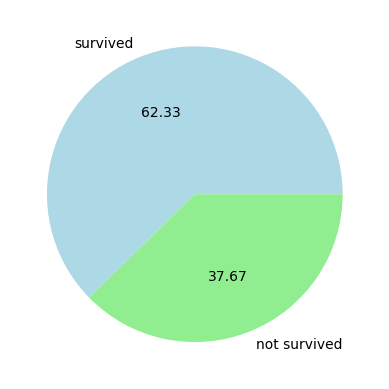

In [104]:
labels=["survived","not survived"]
# cmap = plt.get_cmap('Dark2')
# colors = cmap.colors[:len(labels)]
colors=['lightblue', 'lightgreen', 'orange']

plt.pie(data_set.groupby(['Survived']).size() , labels=labels ,colors=colors, autopct='%0.02f' );

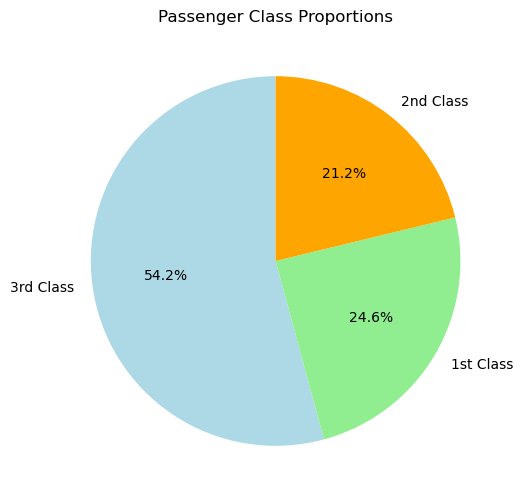

In [103]:
class_counts = data_set_copy['Pclass'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Passenger Class Proportions')
plt.show()

### Survival Rate by Gender

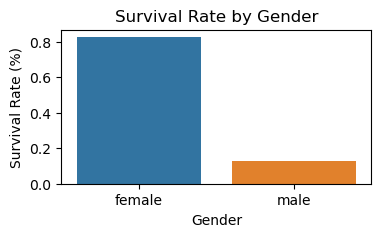

In [66]:
plt.figure(figsize=(4, 2))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.show()

### Survival Rate by Passenger Class

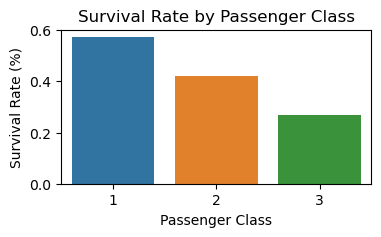

In [67]:
plt.figure(figsize=(4, 2))
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.show()

### Survival Rate by Family Size

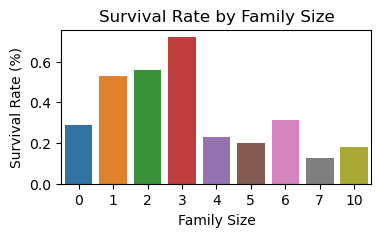

In [69]:
plt.figure(figsize=(4, 2))
sns.barplot(x=survival_rate_by_family_size.index, y=survival_rate_by_family_size.values)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Family Size')
plt.show()

### Survival Rate by Age Group

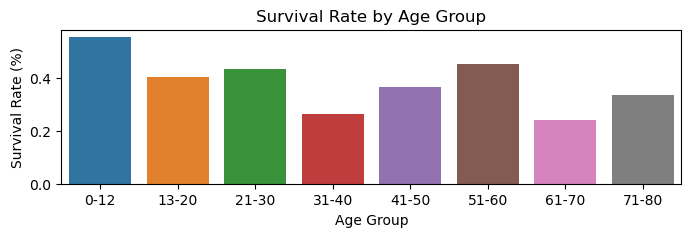

In [73]:
plt.figure(figsize=(8, 2))
sns.barplot(x=survival_rate_by_age_group.index, y=survival_rate_by_age_group.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.show()

### data distribution in different groups

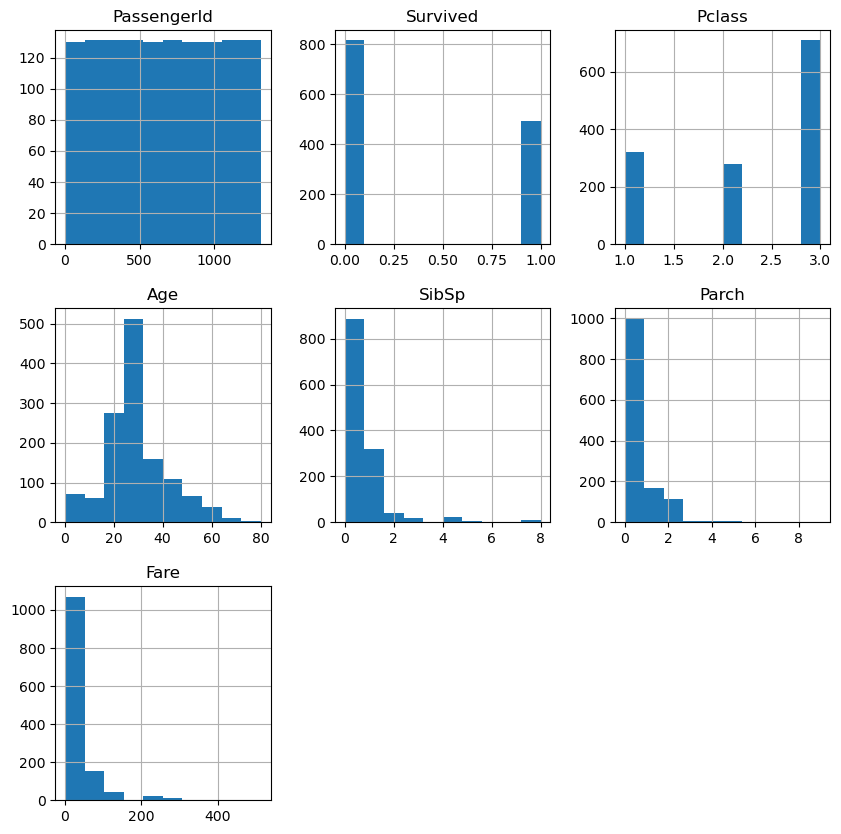

In [90]:
histogram = data_set.hist(figsize = (10,10))

- Survivors: Concentrated between 20-40 years of age.
- Non-Survivors: Also show a concentration in the younger age range, but there are more older non-survivors.
- While young adults had a higher chance of survival, older passengers were more likely to not survive, especially above 50.

### Histograms of Age Distribution

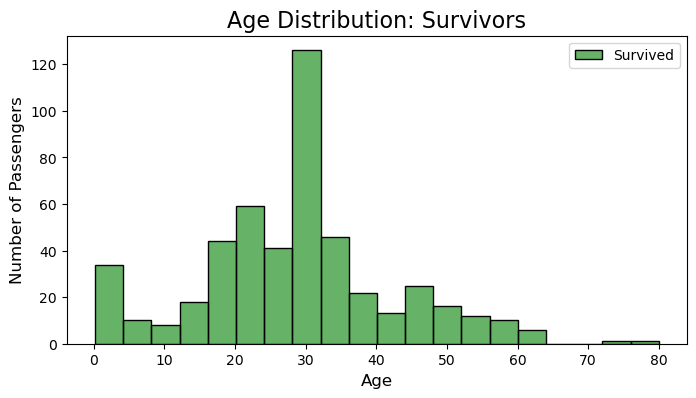

In [93]:
plt.figure(figsize=(8, 4))
sns.histplot(data_set_copy[data_set_copy['Survived'] == 1]['Age'], bins=20, kde=False, color='green', label='Survived', alpha=0.6)
plt.title('Age Distribution: Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.show()

Observation: Most survivors are concentrated in the age range of 20-40, particularly between 20-30. Fewer passengers aged over 60 survived.
Conclusion: Younger passengers had a higher survival rate, especially in their 20s and 30s.

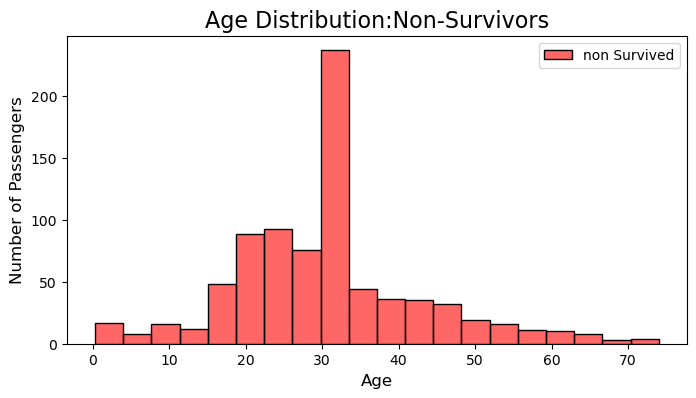

In [92]:
plt.figure(figsize=(8, 4))
sns.histplot(data_set_copy[data_set_copy['Survived'] == 0]['Age'], bins=20, kde=False, color='red', label='non Survived', alpha=0.6)
plt.title('Age Distribution:Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.show()

### box plot

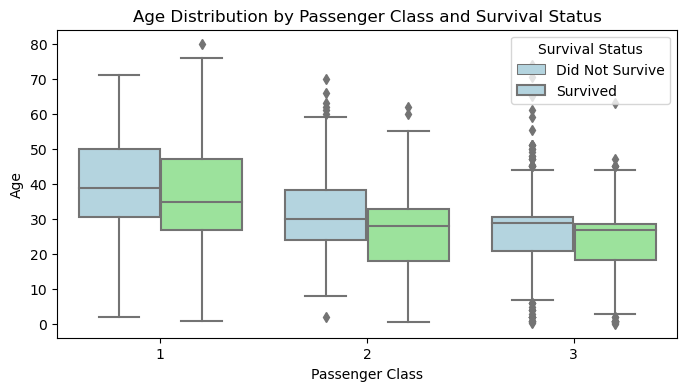

In [105]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=data_set_copy, palette=['lightblue', 'lightgreen', 'orange'])
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survival Status', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()

- First Class (1): Survivors (green) tend to have a wider age range, with many older passengers, while non-survivors (blue) have a smaller range.
- Second Class (2): There's a similar trend, with survivors generally younger than in 1st class.
- Third Class (3): Survivors in 3rd class are mostly younger, and non-survivors are more concentrated in a younger age range. This suggests younger 3rd-class passengers had a higher survival rate.

### Heatmap for understanding the correlation in data

Text(0.5, 1.0, 'Correlation of Features')

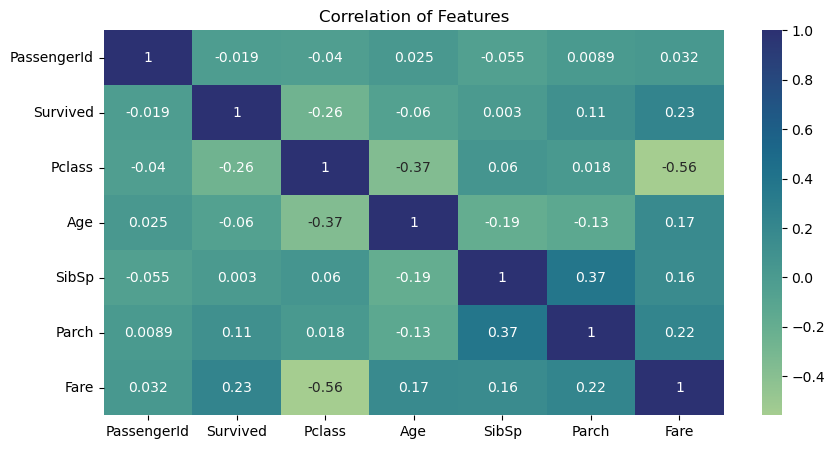

In [107]:
plt.figure(figsize = (10,5))
sns.heatmap(data_set.corr(), annot=True, cmap ='crest')
plt.title("Correlation of Features")

- Pclass and Survival (-0.26): A moderate negative correlation indicates that passengers in lower classes (3rd class) were less likely to survive.
- Fare and Survival (0.23): A positive correlation suggests that passengers who paid higher fares (likely in higher classes) had better survival chances.
- Age and Pclass (-0.37): Older passengers were more likely to be in higher classes.
- The correlations confirm that class and fare had a significant impact on survival, with wealthier passengers more likely to survive.

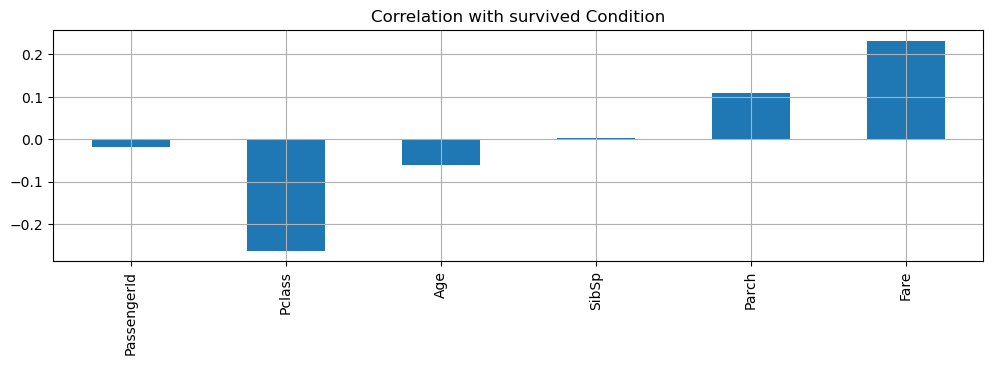

In [99]:
data_set.drop('Survived', axis=1).corrwith(data_set.Survived).plot(kind='bar', grid=True, figsize=(12, 3), title="Correlation with survived Condition", color='#1f77b4');

- Pclass: A negative correlation with survival indicates that passengers in lower classes were less likely to survive.
- Fare: Positive correlation shows that passengers who paid higher fares (likely higher class) were more likely to survive.
- Age: Weak negative correlation with survival, meaning older passengers had slightly lower survival rates.
- SibSp and Parch: Show weak positive correlations with survival, indicating that passengers with family aboard might have had a slightly better chance of survival.

<a id = "6"></a>
<h1  style="color:black;">Final Results </h1>

In [111]:
data_set['FamilySize'] = data_set['SibSp'] + data_set['Parch']

In [112]:
def stacked_bar_chart(feature, title, ax):
    survived = data_set[data_set['Survived'] == 1][feature].value_counts(sort=False)
    not_survived = data_set[data_set['Survived'] == 0][feature].value_counts(sort=False)
    
    df = pd.DataFrame({'Survived': survived, 'Not Survived': not_survived})
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Passengers')

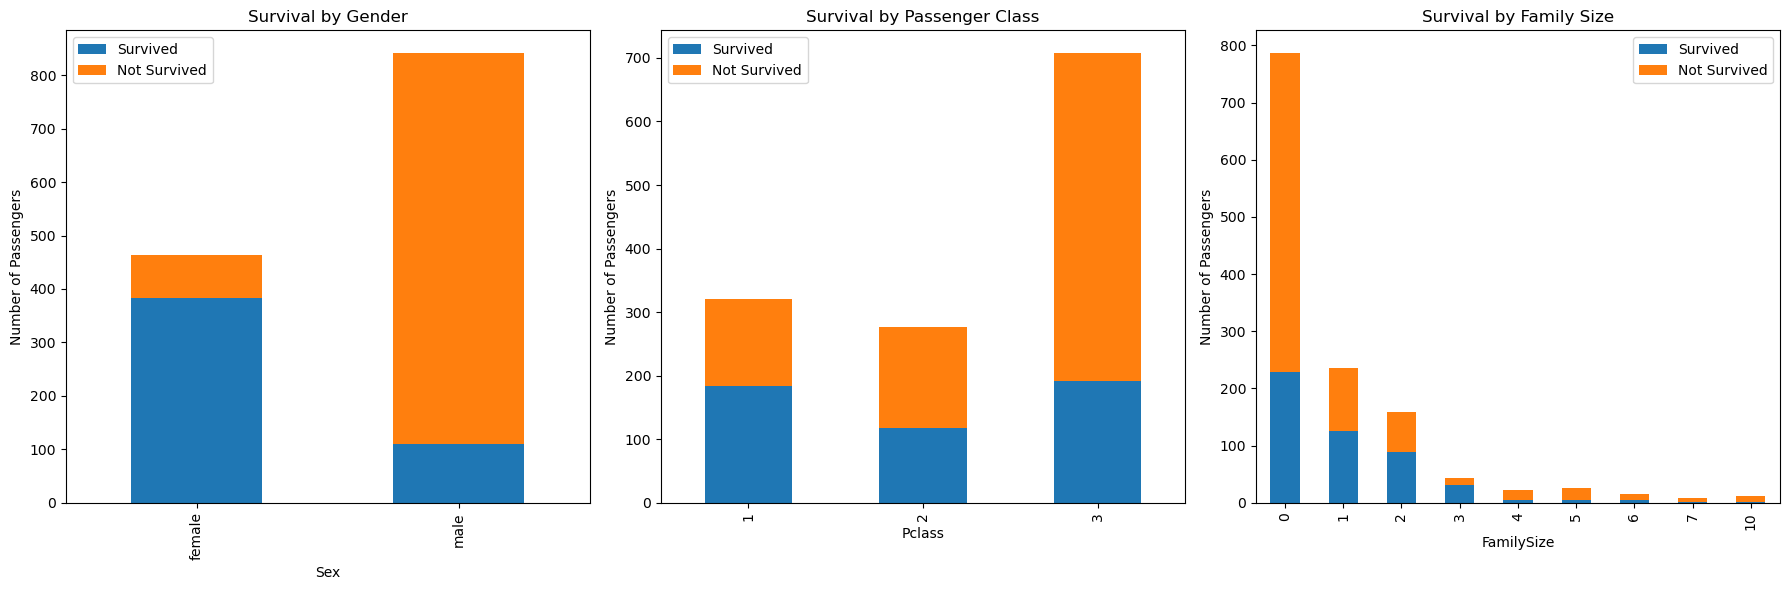

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
stacked_bar_chart('Sex', 'Survival by Gender', axes[0])
stacked_bar_chart('Pclass', 'Survival by Passenger Class', axes[1])
stacked_bar_chart('FamilySize', 'Survival by Family Size', axes[2])
plt.tight_layout()
plt.show()

## 1. Impact of Gender:
Gender was the most significant factor influencing survival rates. Women had a survival rate of 82.54%, while only 12.94% of men survived. This reflects the "women and children first" policy often followed in emergency situations.

## 2. Impact of Passenger Class (Pclass):
Passengers in the first class had the highest survival rate at 57.32%, followed by second class at 42.24%, and third class with the lowest at 26.98%. This indicates that social status and economic position played a major role in survival, with higher-class passengers likely having better access to lifeboats and assistance.

## 3. Impact of Age:
Children under 12 years had the highest survival rate (55.32%). Meanwhile, passengers between the ages of 31-40 (26.40%) and 61-70 (24%) had the lowest. Generally, younger passengers had a better chance of surviving compared to older ones.

## 4. Impact of Family Size:
Individuals with a family size of 1 to 3 had a better chance of survival, particularly families of 3 with a survival rate of 72.09%. Passengers with larger family sizes (5 or more) had significantly lower survival rates. It seems smaller to medium-sized families had an advantage in the evacuation process.

## Conclusion: 
### The analysis indicates that gender, passenger class, age, and family size were key factors in determining survival on the Titanic. Women, children, first-class passengers, and Medium-Sized families were more likely to survive, while third-class passengers, men, older individuals, and those with large families had lower survival rates.